In [1]:
import pandas as pd
import numpy as np

## Explore Data

In [3]:
data=pd.read_csv(r"E:\data_projects\Loan-Approval-Prediction-Dataset\loan_approval_dataset.csv")

In [4]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
data.shape

(4269, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
#check outlier
data_numeric=data.select_dtypes(exclude="object")
for col in data_numeric:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outlier=((data_numeric[col]>upper_bound)|(data_numeric[col]<lower_bound)).sum()
    total=data_numeric[col].shape[0]
    print(f"Total Outliers in {col} are {outlier}-{round(100*(outlier)/total,2)}%")
    if outlier>0:
        data=data.loc[(data[col]<=upper_bound) & (data[col]>=lower_bound)]

Total Outliers in loan_id are 0-0.0%
Total Outliers in  no_of_dependents are 0-0.0%
Total Outliers in  income_annum are 0-0.0%
Total Outliers in  loan_amount are 0-0.0%
Total Outliers in  loan_term are 0-0.0%
Total Outliers in  cibil_score are 0-0.0%
Total Outliers in  residential_assets_value are 52-1.22%
Total Outliers in  commercial_assets_value are 37-0.87%
Total Outliers in  luxury_assets_value are 0-0.0%
Total Outliers in  bank_asset_value are 11-0.26%


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Analysis

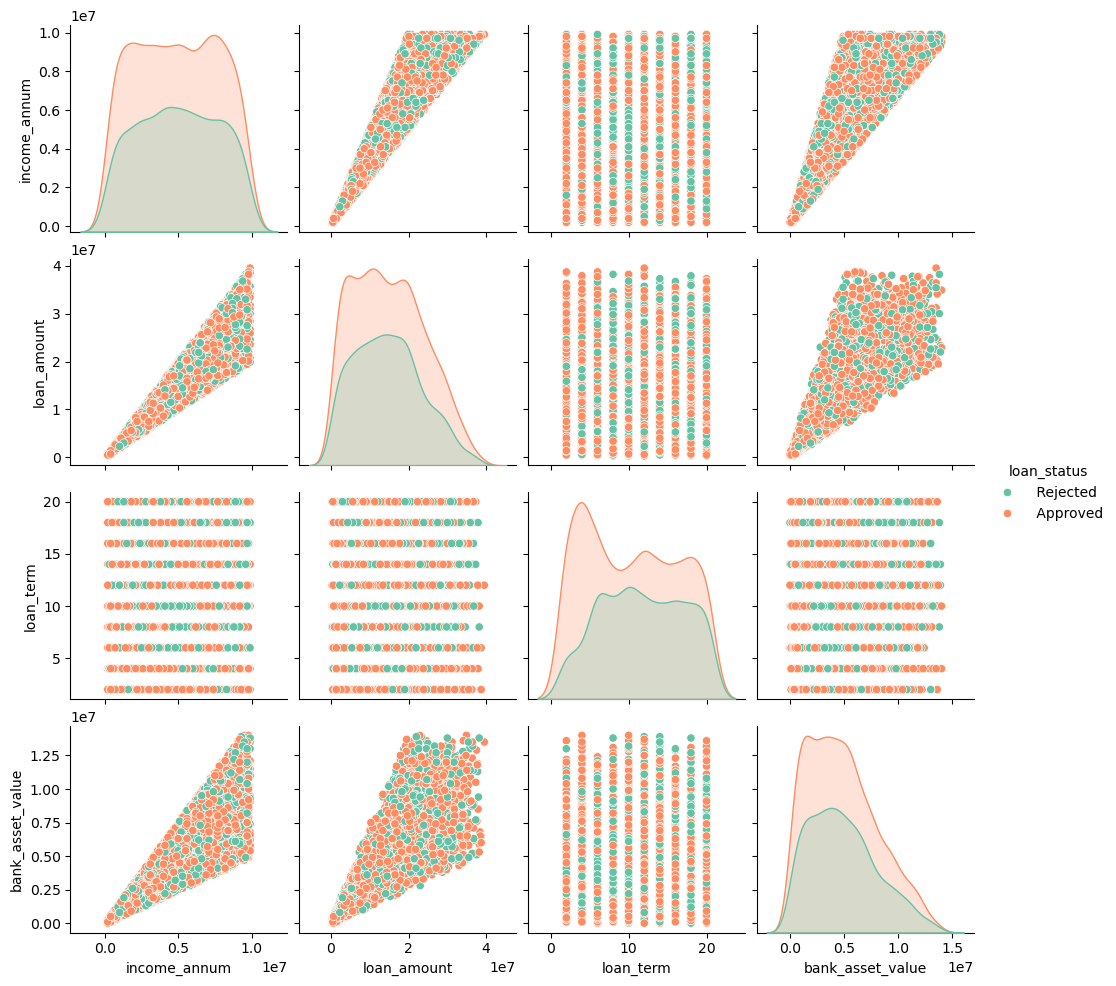

In [14]:
sns.set_palette("Set2")
data.columns = data.columns.str.strip()
sns.pairplot(data, vars=["income_annum", "loan_amount", "loan_term", "bank_asset_value"],hue="loan_status")
plt.show()

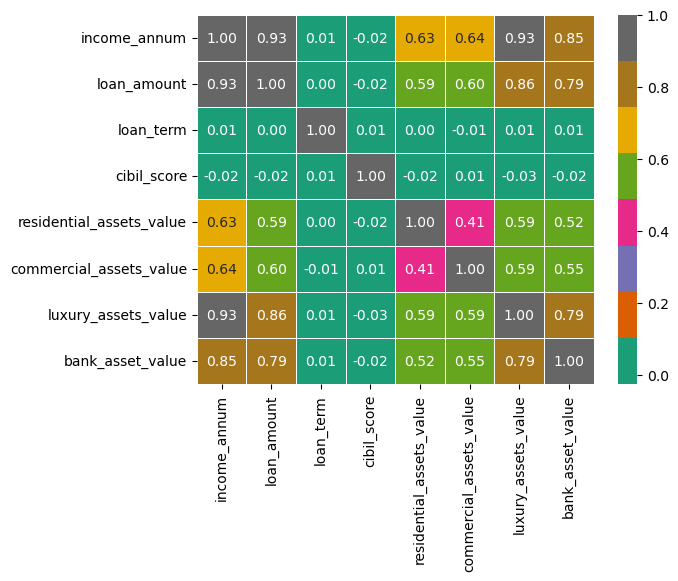

In [15]:
numeric_cols = ["income_annum", "loan_amount", "loan_term", "cibil_score",
                "residential_assets_value", "commercial_assets_value",
                "luxury_assets_value", "bank_asset_value"]
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="Dark2",linewidth=0.5 ,fmt=".2f")
plt.show()

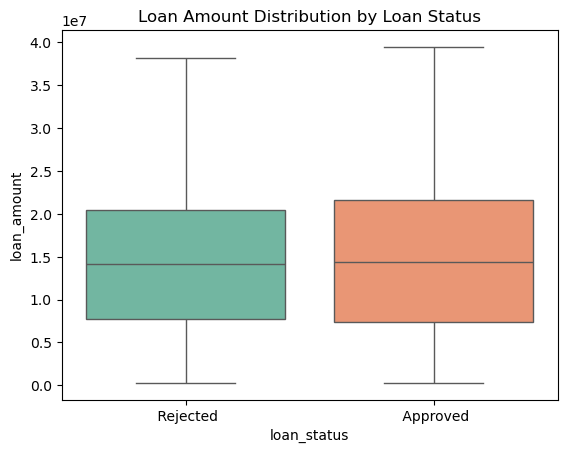

In [16]:
sns.boxplot(data=data, x="loan_status", y="loan_amount", palette="Set2")
plt.title("Loan Amount Distribution by Loan Status")
plt.show()

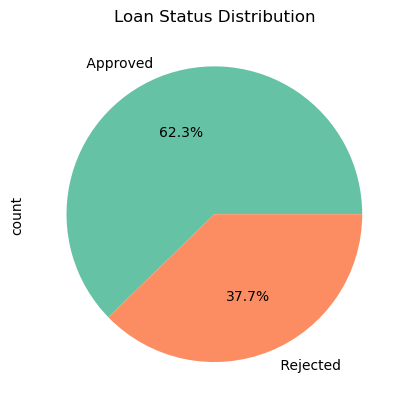

In [17]:
data["loan_status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#66c2a5", "#fc8d62"])
plt.title("Loan Status Distribution")
plt.show()

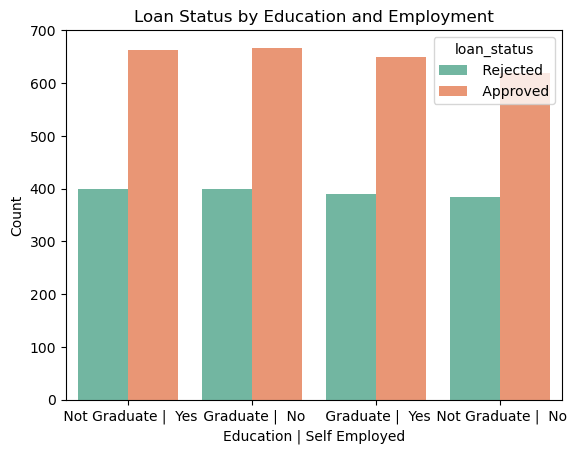

In [18]:
data["edu_self"] = data["education"] + " | " + data["self_employed"]
sns.set_palette("Set2")
sns.countplot(data=data, x="edu_self", hue="loan_status")
plt.title("Loan Status by Education and Employment")
plt.xlabel("Education | Self Employed")
plt.ylabel("Count")
plt.show()

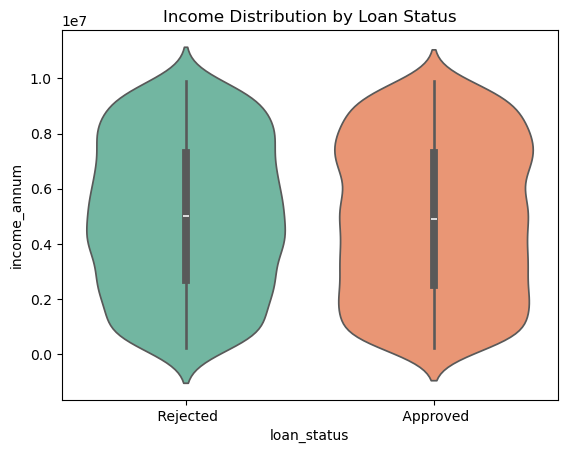

In [19]:
sns.violinplot(data=data, x="loan_status", y="income_annum", palette="Set2")
plt.title("Income Distribution by Loan Status")
plt.show()

## Data Transformation

In [21]:
categorical_columns=data.select_dtypes("object")
for col in categorical_columns:
    print(data[col].value_counts())

education
Graduate        2106
Not Graduate    2067
Name: count, dtype: int64
self_employed
Yes    2102
No     2071
Name: count, dtype: int64
loan_status
Approved    2599
Rejected    1574
Name: count, dtype: int64
edu_self
Graduate |  No         1067
Not Graduate |  Yes    1063
Graduate |  Yes        1039
Not Graduate |  No     1004
Name: count, dtype: int64


In [22]:
# Encode binary categories
data["education"] = data["education"].str.strip()
data["self_employed"] = data["self_employed"].str.strip()
data["loan_status"] = data["loan_status"].str.strip()
data["education_encoded"] = data["education"].map({"Graduate": 1, "Not Graduate": 0})
data["self_employed_encoded"] = data["self_employed"].map({"Yes": 1, "No": 0})
data["loan_status_encoded"] = data["loan_status"].map({"Approved": 1, "Rejected": 0})
#One-Hot Encoding
edu_self_dummies = pd.get_dummies(data["edu_self"], prefix="edu_self").astype(int)
data = pd.concat([data, edu_self_dummies], axis=1)

In [23]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,edu_self,education_encoded,self_employed_encoded,loan_status_encoded,edu_self_ Graduate | No,edu_self_ Graduate | Yes,edu_self_ Not Graduate | No,edu_self_ Not Graduate | Yes
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Not Graduate | Yes,0,1,0,0,0,0,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Graduate | No,1,0,0,1,0,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Graduate | No,1,0,0,1,0,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Not Graduate | Yes,0,1,0,0,0,0,1
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,...,5100000,Rejected,Graduate | Yes,1,1,0,0,1,0,0


In [24]:
data=data.drop(["education","self_employed","loan_status","edu_self"],axis=1)

In [25]:
data.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_encoded', 'self_employed_encoded', 'loan_status_encoded',
       'edu_self_ Graduate |  No', 'edu_self_ Graduate |  Yes',
       'edu_self_ Not Graduate |  No', 'edu_self_ Not Graduate |  Yes'],
      dtype='object')

In [26]:
data.dtypes

loan_id                          int64
no_of_dependents                 int64
income_annum                     int64
loan_amount                      int64
loan_term                        int64
cibil_score                      int64
residential_assets_value         int64
commercial_assets_value          int64
luxury_assets_value              int64
bank_asset_value                 int64
education_encoded                int64
self_employed_encoded            int64
loan_status_encoded              int64
edu_self_ Graduate |  No         int32
edu_self_ Graduate |  Yes        int32
edu_self_ Not Graduate |  No     int32
edu_self_ Not Graduate |  Yes    int32
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Modeling & Evaluation

In [29]:
X=data.drop(["loan_id","loan_status_encoded"],axis=1)
y=data["loan_status_encoded"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def try_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(4, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap='Set2',linewidths=0.5,linecolor='white')

#### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       326
           1       0.79      0.93      0.86       509

    accuracy                           0.81       835
   macro avg       0.82      0.78      0.79       835
weighted avg       0.82      0.81      0.80       835



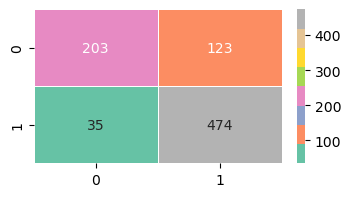

In [33]:
LogisticRegressionModel = LogisticRegression(max_iter=1000)
try_model(LogisticRegressionModel)

#### Random Forest Classifier Model

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       326
           1       0.99      0.98      0.99       509

    accuracy                           0.99       835
   macro avg       0.98      0.99      0.98       835
weighted avg       0.99      0.99      0.99       835



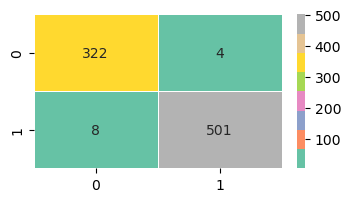

In [35]:
model=RandomForestClassifier()
try_model(model)

#### Gradient Boosting Classifier Model

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       326
           1       0.99      0.98      0.99       509

    accuracy                           0.98       835
   macro avg       0.98      0.98      0.98       835
weighted avg       0.98      0.98      0.98       835



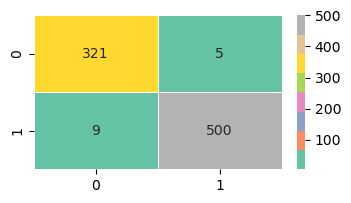

In [37]:
GradientBoostingClassifierModel=GradientBoostingClassifier()
try_model(GradientBoostingClassifierModel)

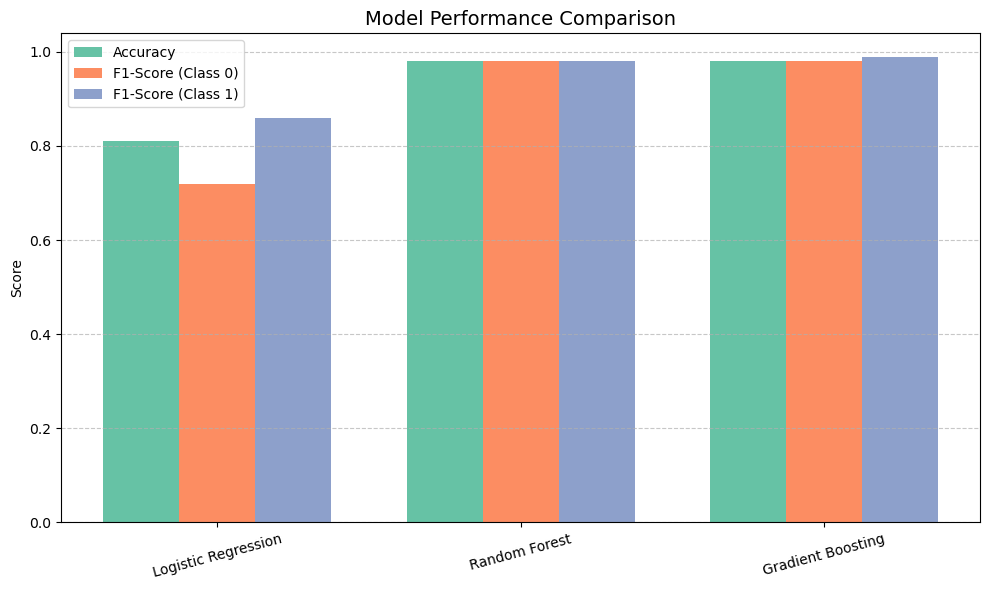

In [38]:
# Model names and metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.81, 0.98, 0.98]
f1_class_0 = [0.72, 0.98, 0.98]
f1_class_1 = [0.86, 0.98, 0.99]
x = np.arange(len(models))
width = 0.25
colors = plt.get_cmap("Set2").colors

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy', color=colors[0])
ax.bar(x, f1_class_0, width, label='F1-Score (Class 0)', color=colors[1])
ax.bar(x + width, f1_class_1, width, label='F1-Score (Class 1)', color=colors[2])
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()